# APS Failure at Scania Trucks - Classification Model
- by **Himanshu Goswami**
- **Lets Connect** -> [Linkedin](https://www.linkedin.com/in/himgos/) , [Github](https://github.com/HimGos)

![pic](https://www.scania.com/content/www/group/en/home/_jcr_content/root/responsivegrid/responsivegrid/responsivegrid_1815906714/heroimage.coreimg.85.1200.jpeg/1651823697429.jpeg)

## Life cycle of Machine Learning project
- Understanding the Problem Statement
- Data Collection
- Exploratory Data Analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Tuning the model
- Picking the Best Model

## 1) Problem Statement
The dataset consists of data collected from heavy Scania trucks in everyday usage.
The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes.
The datasets' positive class consists of component failures for a specific component of the APS system.
The negative class consists of trucks with failures for components not related to the APS.
The data consists of a subset of all available data, selected by experts.

## 2) Data Collection
- The dataset is collected from UCI website, provided by Scania.
- 60000 Instances & 171 attributes.
- Data has one target features named as "Class" with 2 distinct values : positive and negative.

#### Importing Required Packages of various categories like for Analysis, for Visualization, for Model Building etc.

In [1]:
# Data Analysis & Wrangling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

#### Loading Dataset

In [2]:
df = pd.read_csv('data/aps_failure_training_set.csv', skiprows=20)

#### Checking Shape of entire data

In [3]:
df.shape

(60000, 171)

In [4]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


#### Checking Attributes

In [5]:
df.select_dtypes(include=np.number).head()

,aa_000
0,76698
1,33058
2,41040
3,12
4,60874


We can see there is ONLY one attribute which is numeric.
There supposed to be 170 numeric attributes. It means other 169 datasets are having either missing value or wrong value

In [6]:
df['class'].unique()

array(['neg', 'pos'], dtype=object)

![Data Clean](https://149695847.v2.pressablecdn.com/wp-content/uploads/2018/01/data-cleaning.png)

## 3) EDA & Data Cleaning

#### Checking & Dropping Nan values

In [7]:
# Converting 'na' to NaN values using Numpy
df = df.replace('na',np.nan)

In [8]:
# Changing Datatype of all columns to numeric
df.iloc[:,1:] =  df.iloc[:,1:].apply(pd.to_numeric)

# Checking datatypes
df.select_dtypes(exclude=np.number).columns

Index(['class'], dtype='object')

Now all other 170 attributes are numeric!

In [9]:
print("Total Missing fields:-", df.isna().sum().sum())

Total Missing fields:- 850015


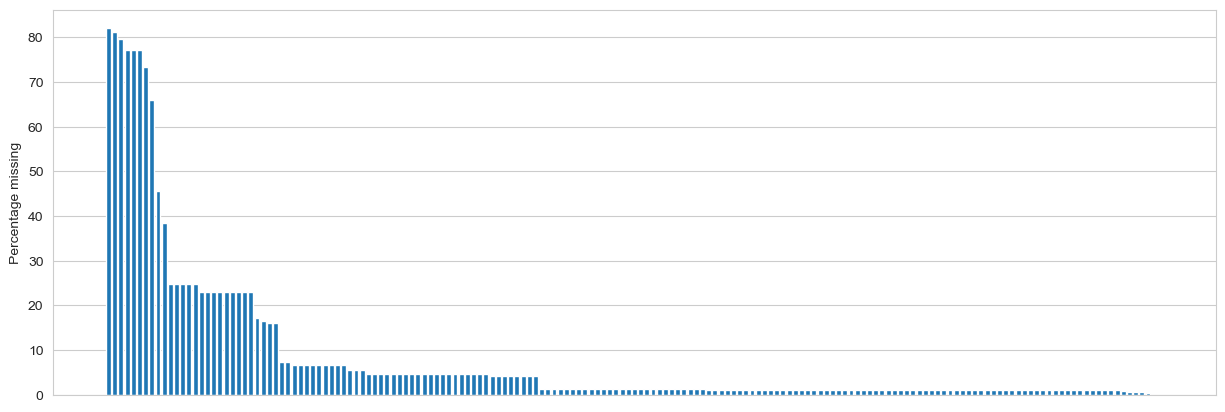

In [10]:
fig, ax = plt.subplots(figsize=(15,5))

# calculating percentage of missing values for each feature
missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

There is some ridiculous amount of missing data in number of columns.

Removing all columns which have more than 40% Data Loss.

In [11]:
cols_missing = missing[missing[0]>40]
print(f"{len(cols_missing)} columns contain more than 33% missing data")

9 columns contain more than 33% missing data


In [12]:
drop_col = list(cols_missing.index)

df = df.drop(drop_col, axis=1)

print("New Shape after removing faulty columns:- ", df.shape)

New Shape after removing faulty columns:-  (60000, 162)


In [13]:
# Filling remaining NaN Values with mean

df.fillna(df.median(), inplace=True)

# Checking number of NaN Values in dataframe
print("Total missing values:- ", df.isna().sum().sum())

Total missing values:-  0


------------------------------------------

## 4) Graphical Analysis

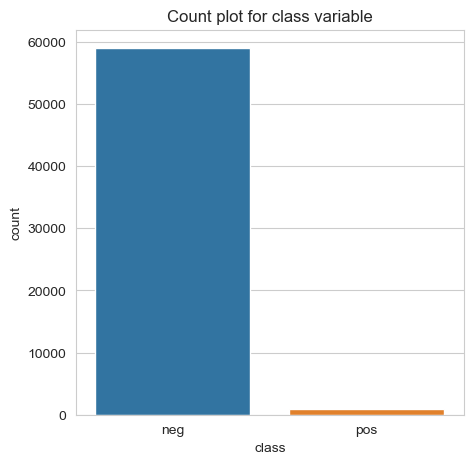

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['class'], )
plt.title("Count plot for class variable")
plt.show();

![pics](https://www.freecodecamp.org/news/content/images/2022/08/A6125B75-DB79-4448-94C9-E6ABD3E0E3E9.jpeg)

# 5) Model Training

In [15]:
X = df.drop('class', axis=1)
y = df['class']
y = pd.get_dummies(y).drop('neg', axis=1)

> ### Splitting & Standardization

In [16]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [17]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Support Vector Classifier" : SVC(),
    "Decision Tree Classifier" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Ada Boost Classifier" : AdaBoostClassifier(),
    "Gradient Boosting Classifier" : GradientBoostingClassifier(),
    "XGBoost" : XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)        # Training Models

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)          #Calculate Accuracy
    model_train_f1 = f1_score(y_train,y_train_pred)                       #Calculate F1 Score
    model_train_precision = precision_score(y_train, y_train_pred)      # Calculate Precision Score
    model_train_recall = recall_score(y_train, y_train_pred)            # Calculate Recall Score
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)     # Calculate ROC AUC Score

    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)        # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1 Score
    model_test_precision = precision_score(y_test, y_test_pred)      # Calculate Precision Score
    model_test_recall = recall_score(y_test, y_test_pred)            # Calculate Recall Score
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)     # Calculate ROC AUC Score

    print(list(models.keys())[i])

    print('Model Performance for Training Set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))



    print('------------------------------------------------')

    print('Model Performance for Test Set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))



    print('='*40)
    print('\n')

Logistic Regression
Model Performance for Training Set
- Accuracy: 0.9928
- F1: 0.7572
- Precision: 0.8440
- Recall: 0.6865
- ROC AUC Score: 0.8422
------------------------------------------------
Model Performance for Test Set
- Accuracy: 0.9909
- F1: 0.9906
- Precision: 0.7814
- Recall: 0.6745
- ROC AUC Score: 0.8356


Support Vector Classifier
Model Performance for Training Set
- Accuracy: 0.9979
- F1: 0.9326
- Precision: 0.9943
- Recall: 0.8782
- ROC AUC Score: 0.9390
------------------------------------------------
Model Performance for Test Set
- Accuracy: 0.9862
- F1: 0.9828
- Precision: 0.8406
- Recall: 0.2736
- ROC AUC Score: 0.6363


Decision Tree Classifier
Model Performance for Training Set
- Accuracy: 1.0000
- F1: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
------------------------------------------------
Model Performance for Test Set
- Accuracy: 0.9892
- F1: 0.9892
- Precision: 0.7005
- Recall: 0.6840
- ROC AUC Score: 0.8394


Random Forest
Model 

> #### We can see our data is overfit somehow and XGBoost gave us the better score. We will perform hyperparameter tuning over it to see if we can add more to it's ROC AUC Score

In [18]:
# Hyperparameter Training

xg_params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

In [19]:
randomcv = RandomizedSearchCV(estimator=XGBClassifier(),
                              param_distributions=xg_params,
                              n_iter=100,
                              cv=3,
                              verbose=2, n_jobs=-1)

In [20]:
randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[19:25:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=2)

In [21]:
randomcv.best_params_

{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 3,
 'gamma': 1,
 'colsample_bytree': 1.0}

In [22]:
xg_model_better = XGBClassifier(n_estimator=200,
                                subsample=1,
                                min_child_weight = 10,
                                max_depth = 3,
                                gamma= 1.5,
                                colsample_bytree = 1)

In [23]:
xg_model_better.fit(X_train, y_train)

[19:25:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:25:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimator=200, n_estimators=100,
              n_jobs=16, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
y_xgb_pred = xg_model_better.predict(X_test)

In [25]:
y_pred_proba = xg_model_better.predict_proba(X_test)

In [26]:
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11788
           1       0.85      0.69      0.76       212

    accuracy                           0.99     12000
   macro avg       0.92      0.84      0.88     12000
weighted avg       0.99      0.99      0.99     12000



> Our overall accuracy received a bit of decrement by tuning the model further, it could be due to our model already being highly accurate so it's tricky to tweak it further.

In [27]:
tn, fp, fn, tp = confusion_matrix(y_test, y_xgb_pred).ravel()

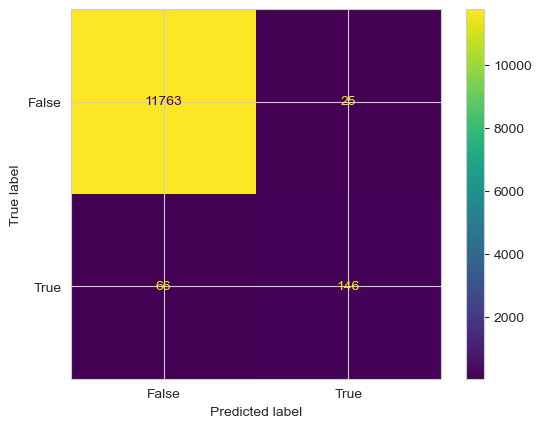

In [32]:
from sklearn import metrics

conf_met = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_xgb_pred), display_labels=[False, True])
conf_met.plot()
plt.show();

In [29]:
print("Total Cost:- ", 10*fp + 500*fn)

Total Cost:-  33250



we can reduce the cost if we put a threshold in our prediction

In [43]:
y_pred_proba[:5]

array([[9.9993604e-01, 6.3970998e-05],
       [9.9972802e-01, 2.7195876e-04],
       [9.9985528e-01, 1.4472957e-04],
       [9.9994409e-01, 5.5912751e-05],
       [9.9976999e-01, 2.3000572e-04]], dtype=float32)

In [44]:
y_test[:5]

,pos
12628,0
37730,0
39991,0
8525,0
8279,0


In [33]:
y_high_prediction = y_pred_proba[:,1] > 0.1

In [38]:
tn, fp, fn, tp = confusion_matrix(y_test, y_high_prediction).ravel()

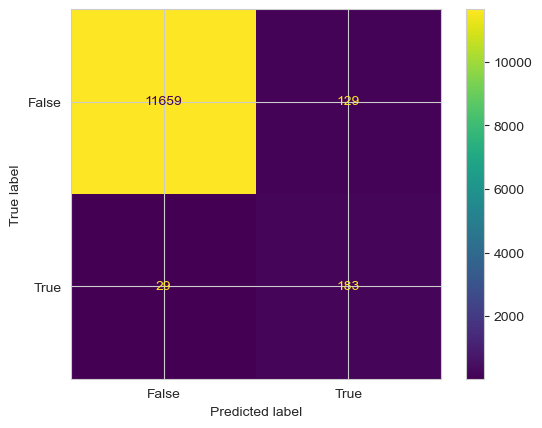

In [39]:
conf_met = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_high_prediction), display_labels=[False, True])
conf_met.plot()
plt.show();

In [40]:
print("Total Cost:- ", 10*fp + 500*fn)

Total Cost:-  15790


--------------------------

## Pickling Model

In [45]:
import pickle

with open('XGBoost Classifier', 'wb') as f:
    pickle.dump(xg_model_better, f)
    print("Model Dumped!")

Model Dumped!


---------------------------------